# <font color='green'><b>Import Library and Dataset</b></font>

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
import seaborn as sns

# Import Dataset

In [3]:
df=pd.read_csv('smoking.csv')

In [4]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


-----

# <font color='green'><b>Business Understanding</b></font>

Tujuan utama dari analisis klasifikasi perokok adalah untuk mengidentifikasi apakah seseorang termasuk dalam kategori perokok atau bukan. Hal ini dapat membantu organisasi, khususnya di bidang kesehatan, untuk memahami lebih baik perilaku perokok, serta untuk mengembangkan program pencegahan dan penghentian merokok. Analisis ini pun berusaha memahami korelasi antara kondisi kesehatan seseorang dengan kebiasaan merokoknya, dengan memahami korelasi tersebut, harapannya program-program pencegahan kebiasan merokok dapat menjadi lebih efektif.

-----

# <font color='green'><b>Data Understanding</b></font>

Dataset ini berisi rangkuman kondisi kesehatan dan status perokok/tidak yang didapatkan melalui aktivitas medical checkup.

Atribut yang terdapat didalam dataset ini:
- ID : serial number given to a person.
- gender: the gender of a person being either female(0) or male(1).
- age : 5-years gap age groups.
- height(cm)
- weight(kg)
- waist(cm) : Waist circumference length
- eyesight(left): Denoted by a value between 0.1-2.5, or 9.9
- eyesight(right): Denoted by a value between 0.1-2.5, or 9.9
- hearing(left): hearing of the person's ear (1 - normal, 2 - abnormal)
- hearing(right): hearing of the person's ear (1 - normal, 2 - abnormal)
- systolic : blood pressure.
- relaxation : blood pressure.
- fasting blood sugar: blood sugar before meals level
- Cholesterol : total
- triglyceride
- HDL : cholesterol type
- LDL : cholesterol type
- hemoglobin
- Urine protein
- serum creatinine
- AST : glutamic oxaloacetic transaminase type
- ALT : glutamic oxaloacetic transaminase type
- Gtp : γ-GTP
- oral : Oral Examination status (s whether the examinee accepted the oral examination).
- dental caries
- tartar : tartar status
- smoking: smoking status of a person (1 - smoking, 0 - non-smoking)

In [5]:
df.shape

(55692, 27)

Korelasi Data

<Axes: >

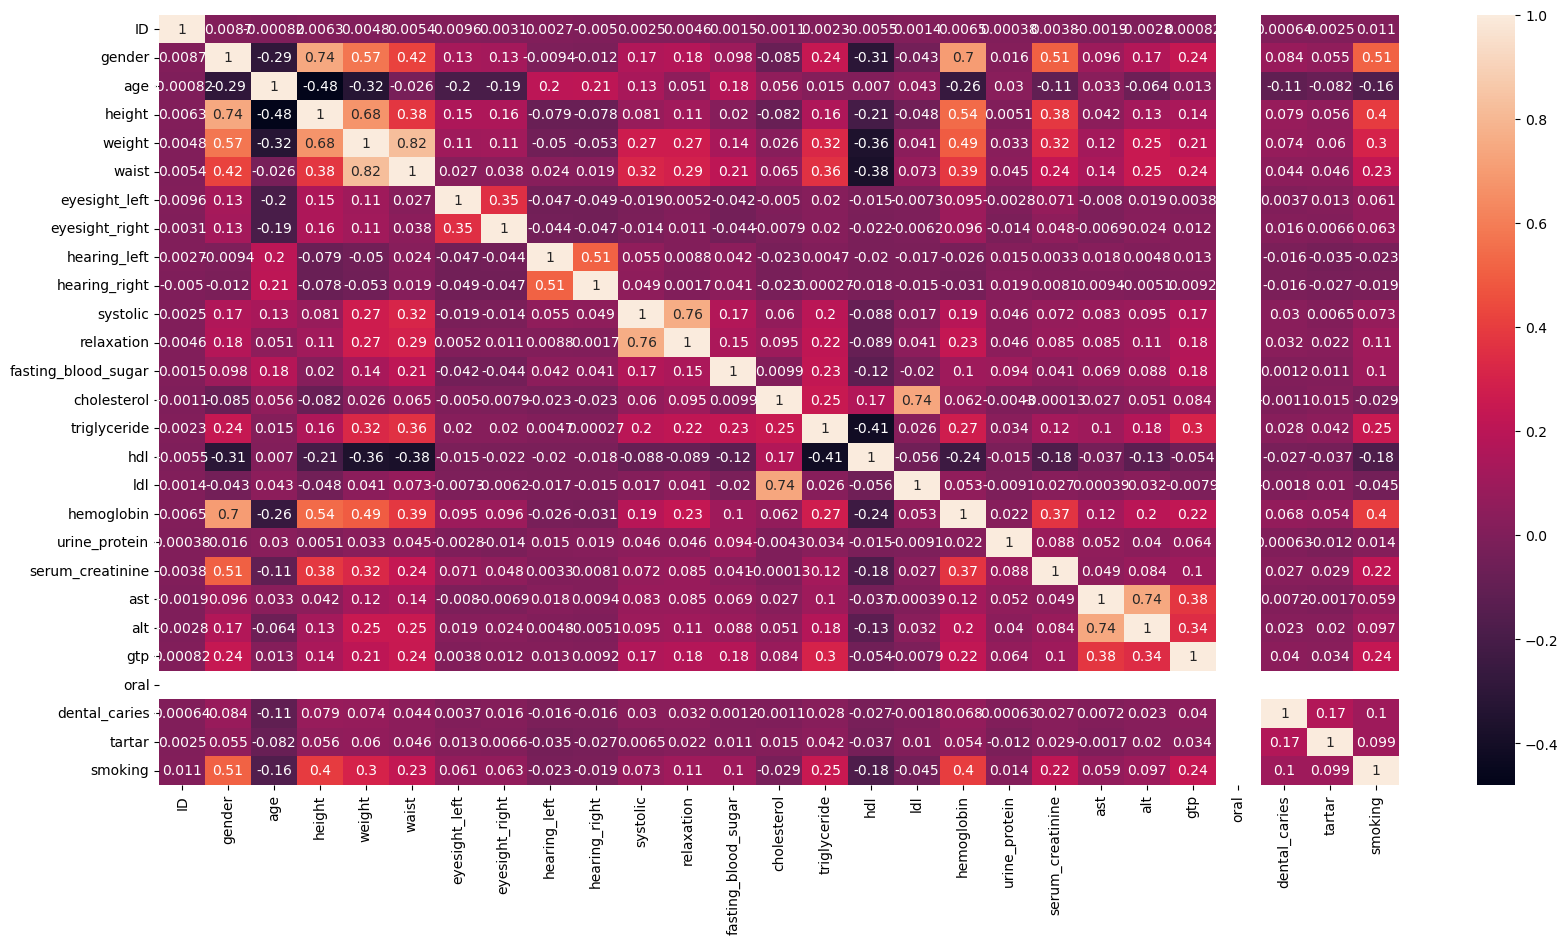

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Pie Chart Persentasi Data

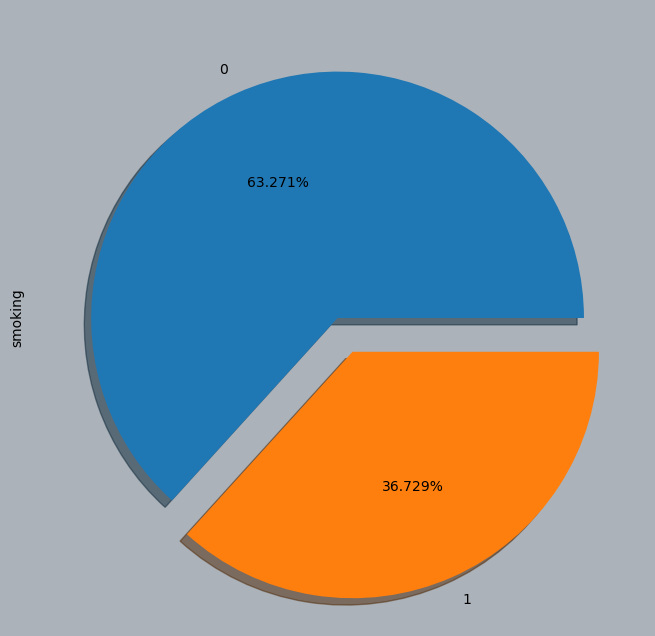

In [60]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["smoking"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True);

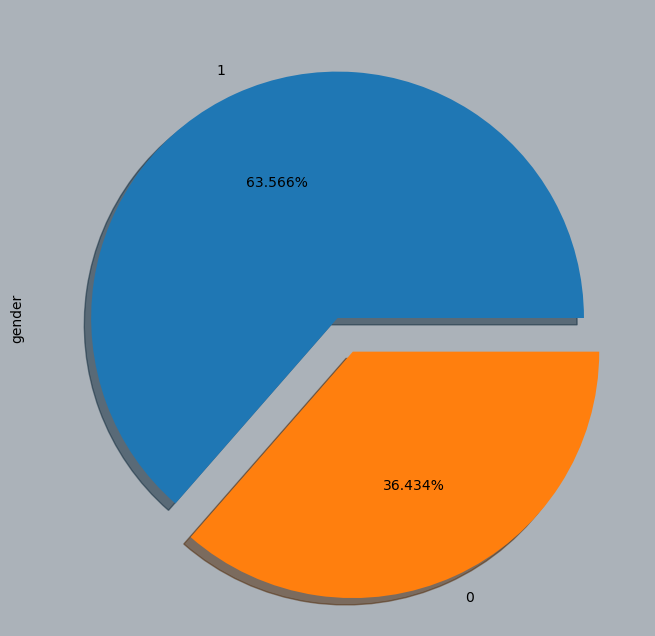

In [62]:
plt.figure(figsize = [8, 8], clear = True, facecolor = "#ABB2B9")
df["gender"].value_counts().plot.pie(explode = [0, 0.15], autopct='%1.3f%%', shadow = True);

-----

# <font color='green'><b>Data Preparation</b></font>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

# Merubah nama kolom agar menjadi lebih efisien

In [8]:
df.rename(columns={'height(cm)':'height', 'weight(kg)':'weight','waist(cm)':'waist',
                        'eyesight(left)':'eyesight_left', 'eyesight(right)':'eyesight_right',
                        'hearing(left)':'hearing_left', 'hearing(right)':'hearing_right',
                        'fasting blood sugar':'fasting_blood_sugar',  'Cholesterol':'cholesterol', 
                        'HDL':'hdl','LDL':'ldl','Urine protein':'urine_protein', 
                        'serum creatinine':'serum_creatinine', 'AST':'ast','ALT':'alt',
                        'Gtp':'gtp', 'dental caries' : 'dental_caries'}, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height               55692 non-null  int64  
 4   weight               55692 non-null  int64  
 5   waist                55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting_blood_sugar  55692 non-null  float64
 13  cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  hdl                  55692 non-null 

In [10]:
df.isna().sum()

ID                     0
gender                 0
age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
oral                   0
dental_caries          0
tartar                 0
smoking                0
dtype: int64

# Convert object datatype into int/float

Convert dtype gender

In [11]:
print(df['gender'])

0        F
1        F
2        M
3        M
4        F
        ..
55687    F
55688    F
55689    F
55690    M
55691    M
Name: gender, Length: 55692, dtype: object


Value Male akan diganti dengan Value 1, sedangkan Value Female akan diganti dengan Value 0

In [12]:
df['gender'] = df['gender'].str.replace('F','0')
df['gender'] = df['gender'].str.replace('M','1')

In [13]:
print(df['gender'])

0        0
1        0
2        1
3        1
4        0
        ..
55687    0
55688    0
55689    0
55690    1
55691    1
Name: gender, Length: 55692, dtype: object


Merubah gender dtype, dari object menjadi int64

In [14]:
df['gender'] = pd.to_numeric(df['gender'])

In [15]:
print(df['gender'])

0        0
1        0
2        1
3        1
4        0
        ..
55687    0
55688    0
55689    0
55690    1
55691    1
Name: gender, Length: 55692, dtype: int64


Convert dtype tartar

In [16]:
print(df['tartar'])

0        Y
1        Y
2        N
3        Y
4        N
        ..
55687    Y
55688    Y
55689    N
55690    N
55691    Y
Name: tartar, Length: 55692, dtype: object


Merubah Value Y menjadi Value 1, merubah Value N menjadi Value 0

In [17]:
df['tartar'] = df['tartar'].str.replace('N','0')
df['tartar'] = df['tartar'].str.replace('Y','1')

In [18]:
print(df['tartar'])

0        1
1        1
2        0
3        1
4        0
        ..
55687    1
55688    1
55689    0
55690    0
55691    1
Name: tartar, Length: 55692, dtype: object


Merubah dtype tartart, dari object ke int64

In [19]:
df['tartar'] = pd.to_numeric(df['tartar'])

In [20]:
print(df['tartar'])

0        1
1        1
2        0
3        1
4        0
        ..
55687    1
55688    1
55689    0
55690    0
55691    1
Name: tartar, Length: 55692, dtype: int64


Convert oral dtype

In [21]:
print(df['oral'])

0        Y
1        Y
2        Y
3        Y
4        Y
        ..
55687    Y
55688    Y
55689    Y
55690    Y
55691    Y
Name: oral, Length: 55692, dtype: object


Merubah Value Y menjadi Value 1, merubah Value N menjadi Value 0

In [22]:
df['oral'] = df['oral'].str.replace('N','0')
df['oral'] = df['oral'].str.replace('Y','1')

Merubah dtype oral, dari object ke int64

In [23]:
df['oral'] = pd.to_numeric(df['oral'])

In [24]:
print(df['oral'])

0        1
1        1
2        1
3        1
4        1
        ..
55687    1
55688    1
55689    1
55690    1
55691    1
Name: oral, Length: 55692, dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  int64  
 2   age                  55692 non-null  int64  
 3   height               55692 non-null  int64  
 4   weight               55692 non-null  int64  
 5   waist                55692 non-null  float64
 6   eyesight_left        55692 non-null  float64
 7   eyesight_right       55692 non-null  float64
 8   hearing_left         55692 non-null  float64
 9   hearing_right        55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting_blood_sugar  55692 non-null  float64
 13  cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  hdl                  55692 non-null 

# Split feature and label

In [26]:
features = ['gender','age','height','weight','waist','eyesight_left','eyesight_right','hearing_left','hearing_right','systolic','relaxation','fasting_blood_sugar','cholesterol','triglyceride','hdl','ldl','hemoglobin','urine_protein','serum_creatinine','ast','alt','gtp','oral','dental_caries','tartar']
x = df[features]
y = df['smoking']
x.shape, y.shape

((55692, 25), (55692,))

In [27]:
print(x)

       gender  age  height  weight  waist  eyesight_left  eyesight_right  \
0           0   40     155      60   81.3            1.2             1.0   
1           0   40     160      60   81.0            0.8             0.6   
2           1   55     170      60   80.0            0.8             0.8   
3           1   40     165      70   88.0            1.5             1.5   
4           0   40     155      60   86.0            1.0             1.0   
...       ...  ...     ...     ...    ...            ...             ...   
55687       0   40     170      65   75.0            0.9             0.9   
55688       0   45     160      50   70.0            1.2             1.2   
55689       0   55     160      50   68.5            1.0             1.2   
55690       1   60     165      60   78.0            0.8             1.0   
55691       1   55     160      65   85.0            0.9             0.7   

       hearing_left  hearing_right  systolic  ...    ldl  hemoglobin  \
0              

In [28]:
print(y)

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64


-----

# <font color='green'><b>Modeling</b></font>

In [29]:
print(x)
print(y)

       gender  age  height  weight  waist  eyesight_left  eyesight_right  \
0           0   40     155      60   81.3            1.2             1.0   
1           0   40     160      60   81.0            0.8             0.6   
2           1   55     170      60   80.0            0.8             0.8   
3           1   40     165      70   88.0            1.5             1.5   
4           0   40     155      60   86.0            1.0             1.0   
...       ...  ...     ...     ...    ...            ...             ...   
55687       0   40     170      65   75.0            0.9             0.9   
55688       0   45     160      50   70.0            1.2             1.2   
55689       0   55     160      50   68.5            1.0             1.2   
55690       1   60     165      60   78.0            0.8             1.0   
55691       1   55     160      65   85.0            0.9             0.7   

       hearing_left  hearing_right  systolic  ...    ldl  hemoglobin  \
0              

# Split data testing and training

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)

In [31]:
print(x.shape, x_train.shape, x_test.shape)

(55692, 25) (44553, 25) (11139, 25)


Membuat Logistic Regression Model

In [33]:
lr = LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

c:\Users\bmkus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Evaluasi Model

In [35]:
x_train_prediction = lr.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [36]:
print('Akurasi data training adalah: ',training_data_accuracy)

Akurasi data training adalah:  0.7192108275537001


In [38]:
x_test_prediction = lr.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [39]:
print('Akurasi data testing adalah: ',test_data_accuracy)

Akurasi data testing adalah:  0.7192746207020378


Input data

In [48]:
input_data = (1,40,160,60,85.5,1.0,1.0,1.0,1.0,116.0,82.0,94.0,226.0,68.0,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,1,1,1)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


pred = lr.predict(input_data_reshape)
print(pred)

if(pred[0] == 0):
    print('Pasien bukan perokok')
else :
    print('Pasien adalah perokok')

[1]
Pasien adalah perokok


c:\Users\bmkus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
input_data = (0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)


pred = lr.predict(input_data_reshape)
print(pred)

if(pred[0] == 0):
    print('Pasien bukan perokok')
else :
    print('Pasien adalah perokok')

[0]
Pasien bukan perokok


c:\Users\bmkus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


-----

# <font color='green'><b>Deployment</b></font>

In [50]:
import pickle

In [51]:
filename = 'smoking_lr.sav'
pickle.dump(lr,open(filename,'wb'))

# StreamlitShare Link

https://beemka17-smoking-classification-smoking-app-p5cz4k.streamlit.app/